In [1]:
# The first three are the year, month and day for thedate of each data point.  
# The fourth column is the closing time value of the NASDAQ Composite index (in USdollars) 
# and the fifth column is the price of a barrel crude oil (in US dollars) for the Crude Oil Prices, West TexasIntermediate.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('data.txt')
print(data[:,:1])

[[2015.]
 [2015.]
 [2015.]
 ...
 [2020.]
 [2020.]
 [2020.]]


In [3]:
# 1. a)

#with a FOR LOOP - NOT efficient
years = data[:,:1]

number_of_days = 0
sixteen = 0
seventeen = 0
eighteen = 0
nineteen = 0


for cell in years:
    if cell != 2015 and cell != 2020:
        number_of_days += 1
        if cell == 2016:
            sixteen +=1
        elif cell == 2017:
            seventeen +=1
        elif cell == 2018:
            eighteen +=1
        elif cell == 2019:
            nineteen += 1

print(f"Year: 2016, Days: {sixteen}, Year: 2017, Days: {seventeen}, Year: 2018, Days: {eighteen}, Year: 2019, Days: {nineteen}, TOTAL OF DAYS (through 2016-2019): {number_of_days}")


# With Numpy (MORE EFFICIENT)
sixteen = data[data[:,0] == 2016]
seventeen = data[data[:,0] == 2017]
eighteen = data[data[:,0] == 2018]
nineteen = data[data[:,0] == 2019]
sixteen = np.shape(sixteen)[0]
seventeen = np.shape(seventeen)[0]
eighteen = np.shape(eighteen)[0]
nineteen = np.shape(nineteen)[0]

print(f"\nYear: 2016, Days: {sixteen}, Year: 2017, Days: {seventeen}, Year: 2018, Days: {eighteen}, Year: 2019, Days: {nineteen}, TOTAL OF DAYS (through 2016-2019): {number_of_days}")

Year: 2016, Days: 252, Year: 2017, Days: 250, Year: 2018, Days: 248, Year: 2019, Days: 250, TOTAL OF DAYS (through 2016-2019): 1000

Year: 2016, Days: 252, Year: 2017, Days: 250, Year: 2018, Days: 248, Year: 2019, Days: 250, TOTAL OF DAYS (through 2016-2019): 1000


In [4]:
# 1. b)

from statistics import mean

days = [sixteen, seventeen, eighteen, nineteen]

# Average
print(mean(days))

250


In [5]:
# 1. c)

# What is the minimum price of crude oil (fifth column) for each year from 2015 through 2020?

def minimum_crude(year):
    all_year = data[data[:,0] == year]
    min_crude = np.min(all_year[:, -1])
    return(min_crude)

# array with all the years
dates = [2015, 2016, 2017, 2018, 2019, 2020]

# column that has the crude oil values daily
crude_oil = data[:,-1]

# getting the minimum vale for each year.
for date in dates:
    print(f"Year: {date}, Value: {minimum_crude(date)}")

Year: 2015, Value: 34.55
Year: 2016, Value: 26.19
Year: 2017, Value: 42.48
Year: 2018, Value: 44.48
Year: 2019, Value: 46.31
Year: 2020, Value: -36.98


In [6]:
# 1. d)


index_min = data[np.argmin(data[:,-1])]

print(f"Year: {int(index_min[0])}, Month: {int(index_min[1])}, Day: {int(index_min[2])}, NASDAQ: {index_min[3]}, Crude Oil: {index_min[-1]}")

Year: 2020, Month: 4, Day: 20, NASDAQ: 8560.730469, Crude Oil: -36.98


Taking the data from mid-2016 until mid-2019, and plotting the moving average of 30 days in the first graph,
we can see that the evolution of the data clearly.
We have to take out seasonality.


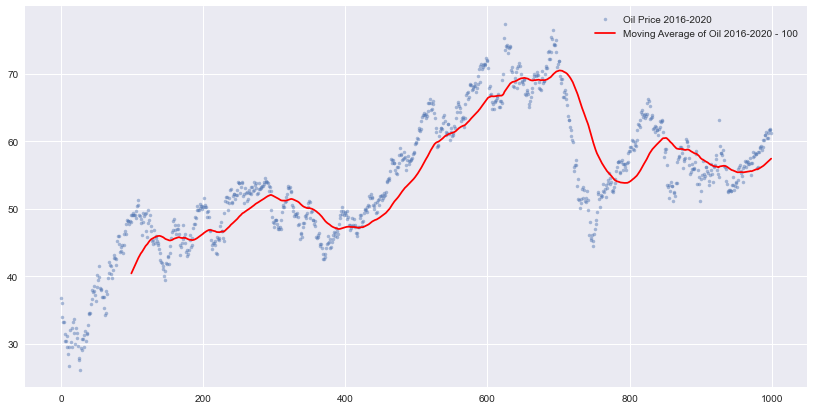

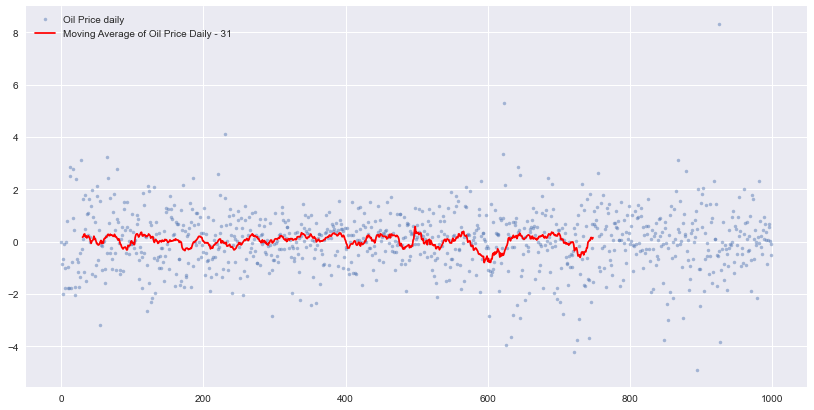

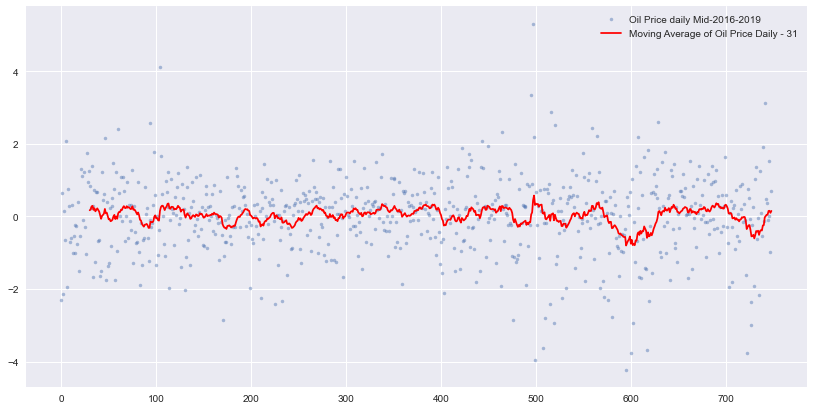

In [7]:
# 2


# get data from 2016 to 2019
data_filtered = data[data[:,0] != 2015]
data_filtered = data_filtered[data_filtered[:,0] != 2020]
data_filtered

# moving average starting from mid 2016 and ending mid 2019 chosen in a way that allows us to 
# see the yearly change in price without the interference of seasonal variations within each year

def values_per_day(values):    
    per_day = np.zeros(len(values))    
    per_day[1:] = values[1:]-values[:-1]
    return per_day

# WA MOVING AVERAGE THAT ONLY LOOKS
def financial_moving_average(values, window):
    x = np.arange(window-1,len(values))  
    y = []
    for ix in x:   
        y.append(np.mean(values[ix-window+1:ix+1]))
    return x, np.array(y)


# LWMAs are quicker to react to price changes than simple moving averages (SMA) and exponential moving averages (EMA). 
def linear_moving_average(values, window):    
    weights = np.arange(window)+1    
    scale = 1/(window*(window+1)/2)   
    x = np.arange(window-1,len(values))    
    y = []
    for ix in x:      
        y.append(scale*np.sum(values[ix-window+1:ix+1]*weights))
    return x, np.array(y)


# DAILY OIL PRICE IN 2016-2020
oil_price_daily_1620 = values_per_day(data_filtered[:,-1])

plt.style.use('seaborn')

# Get the value of middle 2016 and middle 2019

middle_nineteen = int(nineteen/2)
middle_sixteen = int(sixteen/2)


# we plot the graph of the moving average with a window of 100 so that it can smooth out the noise of random outliers and emphasize the long term trend of the model. 
plt.figure(figsize=(14,7))
x_4,y_4 = linear_moving_average(data_filtered[:,-1], 100)
plt.plot(data_filtered[:, -1], '.', alpha=0.45)
plt.plot(x_4,y_4, alpha=1, color="red")
plt.legend(["Oil Price 2016-2020", "Moving Average of Oil 2016-2020 - 100"])

print('''Taking the data from mid-2016 until mid-2019, and plotting the moving average of 30 days in the first graph,
we can see that the evolution of the data clearly.
We have to take out seasonality.''')

# Plotting the Moving Average starting in the middle of 2016 and ending in the middle of nineteen
# In the first exercise, we saw that each year has about 250 days. 250/4 = 62 days. 
# If we have a window of about 30 days, we plot the graph of the moving average so that it can smooth out the noise of random outliers and emphasize the long term trend of the model. 

plt.figure(figsize=(14,7))
x_3,y_3 = linear_moving_average(oil_price_daily_1620[middle_sixteen:-middle_nineteen], 31)
plt.plot(oil_price_daily_1620, '.', alpha=0.45)
plt.plot(x_3,y_3, alpha=1, color="red")
plt.legend(["Oil Price daily", "Moving Average of Oil Price Daily - 31"])



plt.figure(figsize=(14,7))
x_3,y_3 = linear_moving_average(oil_price_daily_1620[middle_sixteen:-middle_nineteen], 31)
plt.plot(oil_price_daily_1620[middle_sixteen:-middle_nineteen], '.', alpha=0.45)
plt.plot(x_3,y_3, alpha=1, color="red")
plt.legend(["Oil Price daily Mid-2016-2019", "Moving Average of Oil Price Daily - 31"])





In fact, the oil price decreased to levels similar to the beginning/middle of June 2020.


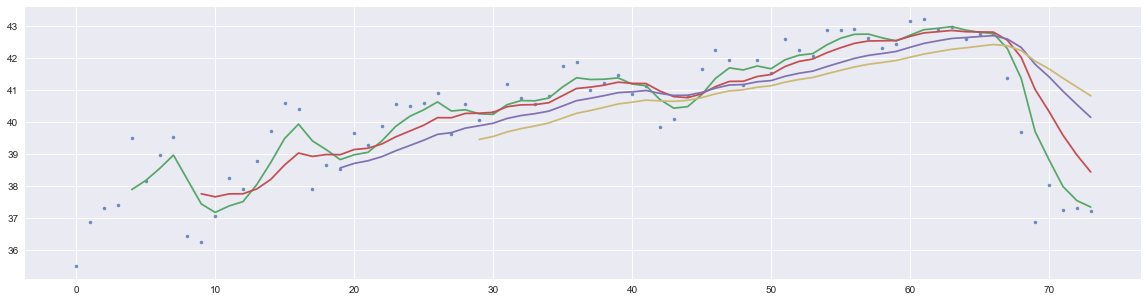

In [8]:
# 3

# LWMAs are quicker to react to price changes than simple moving averages (SMA) and exponential moving averages (EMA). It gives more weight to the last values, like asked.
def linear_moving_average(values, window):    
    weights = np.arange(window)+1    
    scale = 1/(window*(window+1)/2)   
    x = np.arange(window-1,len(values))    
    y = []
    for ix in x:      
        y.append(scale*np.sum(values[ix-window+1:ix+1]*weights))
    return x, np.array(y)


# get data from June 2020 to the end
last_year = data[data[:,0]==2020]
last_year = last_year[np.where((last_year[:,1]>=6))]


plt.figure(figsize=(20,5))
plt.plot(last_year[:,-1], '.', alpha=0.8)
# Various windows values so that we can see the differences when the function takes into account more time. 
# When the window is smaller (green), it's more similar to the real time series plot and, as such, the last value is smaller.
for window in [5,10,20,30]:    
    x, m_a = linear_moving_average(last_year[:,-1], window)   
    plt.plot(x,m_a, label=f'Linear Moving Average {window}')

    
print('In fact, the oil price decreased to levels similar to the beginning/middle of June 2020.')
#plt.plot(x_7,y_7, alpha=1, color="red")
#plt.legend(["Oil Price - Smoothen weekly", "Linear Moving Average - 15"])
# moving average that smoothens flunctutions from week to week

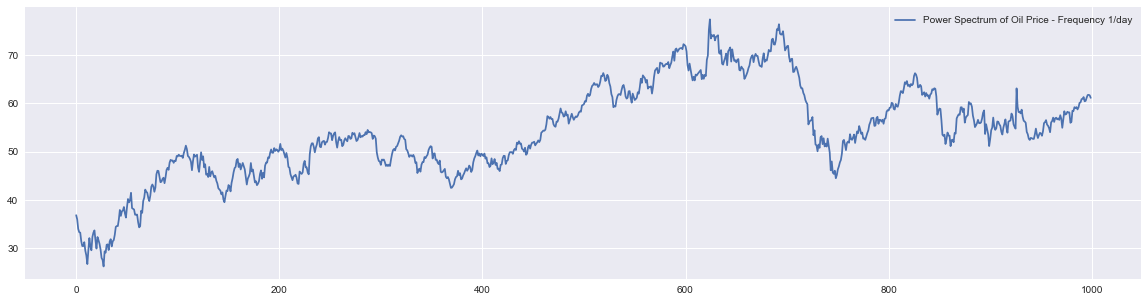

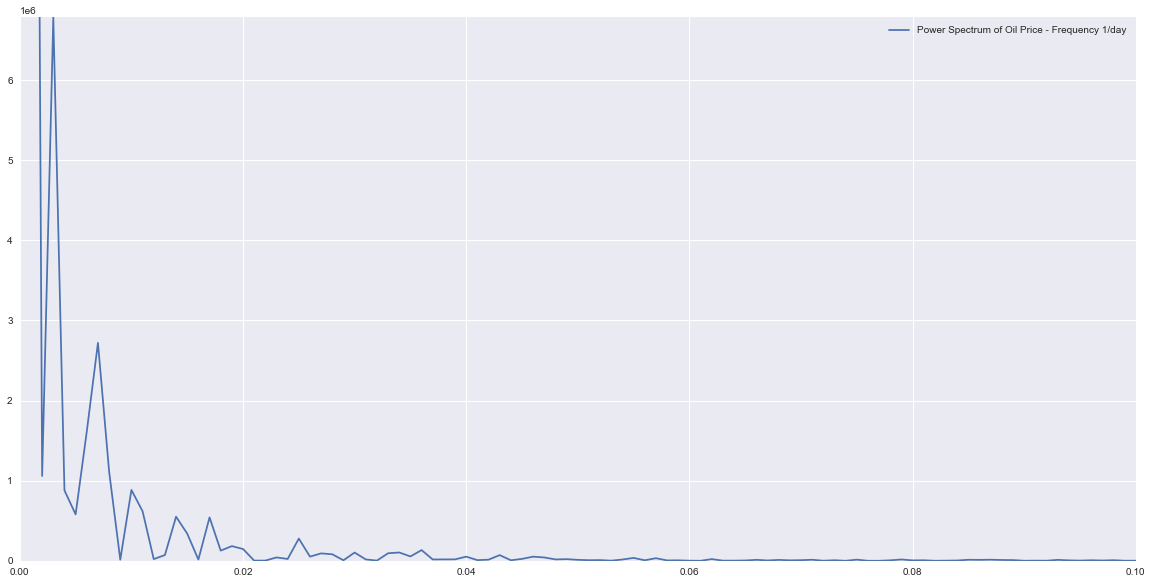

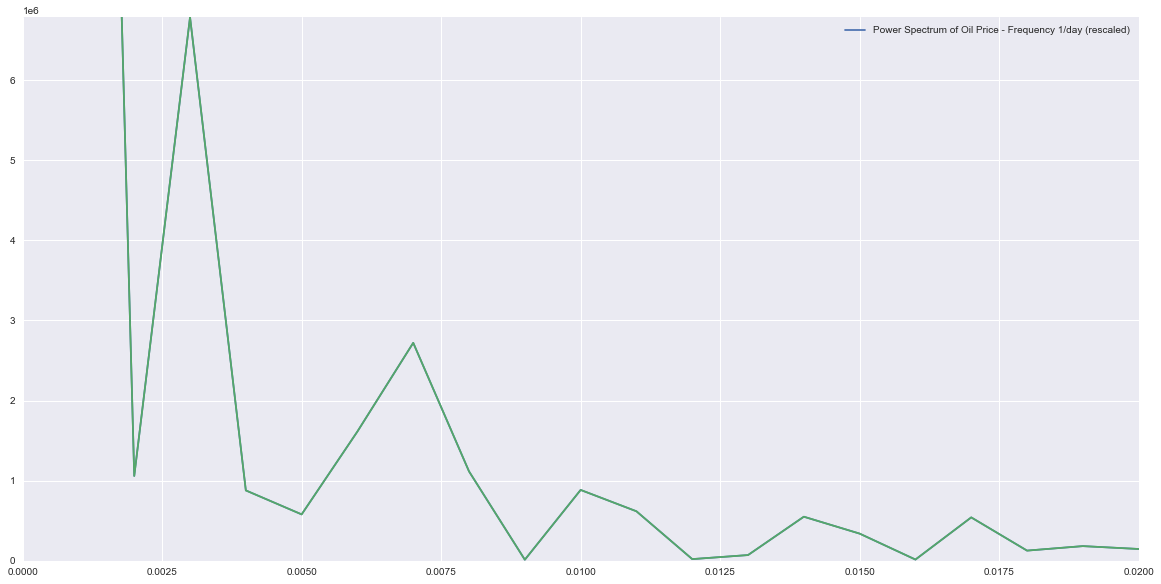

In [58]:
# 4

oil_price = data_filtered[:,-1]
plt.figure(figsize=(20,5))
plt.plot(oil_price)
plt.legend(["Power Spectrum of Oil Price - Frequency 1/day"])

plt.figure(figsize=(20,10))
pow_spectrum = np.abs(np.fft.rfft(oil_price))**2
frequency = np.fft.rfftfreq(len(oil_price),1)
#plt.plot(frequency,pow_spectrum)

# if you have a aseries that is not centered and has some trend, the very low frequencies will have a very large signal.
# for that reason, we have to start at 3.
plt.ylim(0,np.max(pow_spectrum[3:]))
plt.xlim(0,0.1)
plt.plot(frequency,pow_spectrum)
plt.legend(["Power Spectrum of Oil Price - Frequency 1/day"])

# we can't really conclude anything in concrete because of the scale. 
plt.figure(figsize=(20,10))
plt.plot(frequency,pow_spectrum)
plt.ylim(0,np.max(pow_spectrum[3:]))
# Let's rescale it:
plt.xlim(0,0.02)
plt.plot(frequency,pow_spectrum)
plt.legend(["Power Spectrum of Oil Price - Frequency 1/day (rescaled)"])

# So, we can see that 1/day = 0,003 => days = 333 (~about a year, more or less)
# We can also see that 1/day = 0,07 => days = ~143 (143 days out of a mean of 250 per year. 143/250 = 0,572, which means a period of 6 months.)

# As such, we can actually conclude that are regular flunctuations, both yearly and semesterly. This can be for a number of reasons,
# which we cannot infer from the data. However, the data seems to support the hypothesis given in the assignment by the professor.


(array([-125, -124, -123, -122, -121, -120, -119, -118, -117, -116, -115,
        -114, -113, -112, -111, -110, -109, -108, -107, -106, -105, -104,
        -103, -102, -101, -100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,
         -92,  -91,  -90,  -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,
         -81,  -80,  -79,  -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,
         -70,  -69,  -68,  -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,
         -59,  -58,  -57,  -56,  -55,  -54,  -53,  -52,  -51,  -50,  -49,
         -48,  -47,  -46,  -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,
         -37,  -36,  -35,  -34,  -33,  -32,  -31,  -30,  -29,  -28,  -27,
         -26,  -25,  -24,  -23,  -22,  -21,  -20,  -19,  -18,  -17,  -16,
         -15,  -14,  -13,  -12,  -11,  -10,   -9,   -8,   -7,   -6,   -5,
          -4,   -3,   -2,   -1,    0,    1,    2,    3,    4,    5,    6,
           7,    8,    9,   10,   11,   12,   13,   14,   15,   16,   17,
          18,   19,   20,   21,   22, 

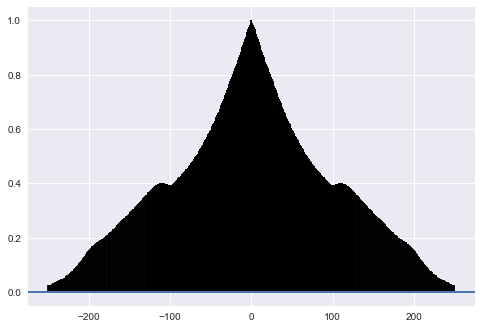

In [69]:
plt.acorr(oil_price-np.mean(oil_price),maxlags=250)
plt.acorr(oil_price-np.mean(oil_price),maxlags=125)

Correlation value: 0.775459322045879
Correlation value after 2 days: 0.7743761472490873
Correlation value after 30 days: 0.7484426557507307
Correlation value after 90 days: 0.6916071715994518

From the correlation coefficient, we can infer that both variables are greatly correlated. 
The correlation value is 0.775459322045879.
Furthermore, this correlation is without shifting any of the variables in time and it's the highest value found.


I divided both the variables by their means to compare their behaviour more easily overtime. 
I can see that they do have a similar behaviour and the difference in time is really small between their reactions.



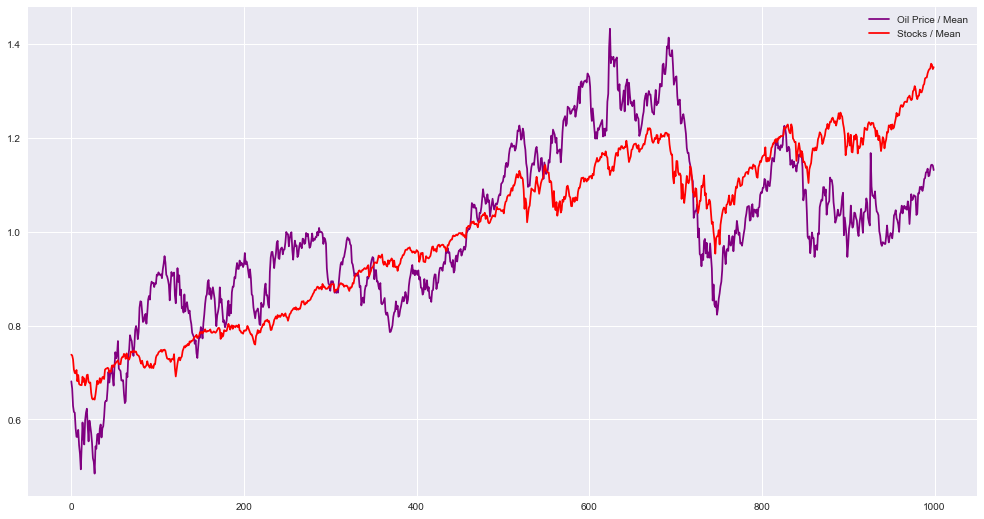

In [12]:
# 5

#Filtering the data to only include the values from 2016 to 2020.
data_filtered = data[data[:,0] != 2015]
data_filtered = data_filtered[data_filtered[:,0] != 2020]
data_filtered

# Calculating the correlation between the two variables.
print(f'Correlation value: {np.corrcoef(data_filtered[0:,-1],data_filtered[0:,-2])[0,1]}')
print(f'Correlation value after 2 days: {np.corrcoef(data_filtered[2:,-1],data_filtered[2:,-2])[0,1]}')
print(f'Correlation value after 30 days: {np.corrcoef(data_filtered[30:,-1],data_filtered[30:,-2])[0,1]}')
print(f'Correlation value after 90 days: {np.corrcoef(data_filtered[90:,-1],data_filtered[90:,-2])[0,1]}')
print(f'''\nFrom the correlation coefficient, we can infer that both variables are greatly correlated. 
The correlation value is {np.corrcoef(data_filtered[0:,-1],data_filtered[0:,-2])[0,1]}.
Furthermore, this correlation is without shifting any of the variables in time and it's the highest value found.
''')


# Plotting the graph with both variables divided by their means

plt.figure(figsize=(17, 9))
plt.plot(data_filtered[:,-1]/np.mean(data_filtered[:,-1]), color="purple", alpha=1)
plt.plot(data_filtered[:,-2]/np.mean(data_filtered[:,-2]), color="red", alpha=1)
plt.legend(["Oil Price / Mean", "Stocks / Mean"])

print(f'''\nI divided both the variables by their means to compare their behaviour more easily overtime. 
I can see that they do have a similar behaviour and the difference in time is really small between their reactions.
''')

#continues next cell

Possible Shift of 300 days: [0.775459322045879]

As we can see, when we try to see if the correlation is bigger when we shift one of the varaibles value, the biggest correlation value is the same as the correlation in the same day.
As such, we can conclude that both variables are greatly correlated (0.775459322045879) but a person cannot take advantage because they follow each other so closely in time.
Furthermore, we cannot infer correlation does not imply causality. They follow each other pretty closely, so when one increases, the other most probaly will also increase (positive correlation).


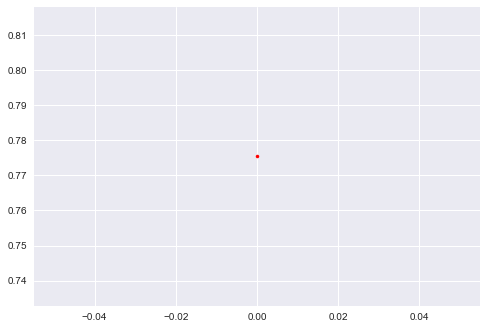

In [13]:
# 5 cont

def shifted_corr(reference, shifted, max_shift):
    corrs = []
    for shift in range(max_shift+1):
        corr = np.corrcoef(reference[shift:], shifted[:len(shifted)-shift])
        corrs.append(corr[0,1])
        return corrs
    
oil = data_filtered[:,-1]
stocks = data_filtered[:,-2]
    
print(f'Possible Shift of 300 days: {shifted_corr(oil,stocks,300)}')

plt.plot(shifted_corr(oil,stocks,300), '.', color="red")

print('\nAs we can see, when we try to see if the correlation is bigger when we shift one of the varaibles value, the biggest correlation value is the same as the correlation in the same day.')
print(f'As such, we can conclude that both variables are greatly correlated ({np.corrcoef(data_filtered[0:,-1],data_filtered[0:,-2])[0,1]}) but a person cannot take advantage because they follow each other so closely in time.')
print('Furthermore, we cannot infer correlation does not imply causality. They follow each other pretty closely, so when one increases, the other most probaly will also increase (positive correlation).')
#2.1.3 lecture notes